# ML Project : Predicting Term Deposit Subscription Using Bank Marketing Data

## Project Introduction 
In the highly competitive banking sector, marketing campaigns are essential for promoting financial products like term deposits. However, these campaigns often result in low success rates, making it crucial for banks to identify and target the right customers more effectively.

This project focuses on building a machine learning classification model to predict whether a customer will subscribe to a term deposit (yes or no) based on historical data collected from direct marketing efforts by a Portuguese bank. The dataset, sourced from the UCI Machine Learning Repository, includes a wide range of features such as:

* **Customer details :** age, job, marital status, education
* **Contact information :** contact type, day, duration
* **Campaign history :** number of contacts, previous outcomes
* **Economic context :** consumer confidence, employment variation rate

### Project Objective
The main goal of this project is to develop and evaluate classification models that can:

* Predict a customer’s likelihood of subscribing to a term deposit
* Identify key factors that influence customer decisions
* Support marketing teams in improving campaign efficiency and reducing costs

## Dataset Overview
The dataset used in this project is the Bank Marketing Dataset from the UCI Machine Learning Repository. It contains information collected from direct marketing campaigns of a Portuguese banking institution.

* **Source:** UCI Machine Learning Repository
* **Number of Records (Rows):** 45,211
* **Number of Features (Columns):** 17 input features + 1 target variable
* **Target Variable:** y – Indicates if the client subscribed to a term deposit (yes or no)
* **Feature Types:** Mixed — includes both categorical and numerical variables
* **Missing Values:** No missing values, but some features contain 'unknown' as a placeholder
* **Period of Data Collection:** From May 2008 to November 2010
* **Application Domain:** Marketing and Finance
* **Machine Learning Task:** Binary Classification

### Feature Details

**1. Client Information**
* age: Age of the client (numerical)  
* job: Type of job (categorical – e.g., admin., technician, management, etc.)  
* marital: Marital status (categorical – e.g., single, married, divorced)  
* education: Education level (categorical)  
* default: Has credit in default? (yes, no, unknown)  
* housing: Has a housing loan? (yes, no, unknown)  
* loan: Has a personal loan? (yes, no, unknown)  

**2. Last Contact Information**
* contact: Type of communication (categorical – cellular or telephone)  
* month: Last contact month (categorical – e.g., may, jun, nov)  
* day_of_week: Last contact day of the week (categorical)  
* duration: Duration of the last contact (in seconds) – very influential but only known after the call

**3. Campaign Information**
* campaign: Number of contacts performed during this campaign (numeric)  
* pdays: Days since the client was last contacted from a previous campaign (-1 means never contacted)  
* previous: Number of contacts performed before this campaign  
* poutcome: Outcome of the previous marketing campaign (success, failure, nonexistent)

**4. Socioeconomic Indicators**
* emp.var.rate: Employment variation rate (numeric – quarterly indicator)  
* cons.price.idx: Consumer price index (numeric – monthly indicator)  
* cons.conf.idx: Consumer confidence index (numeric – monthly indicator)  
* euribor3m: Euribor 3-month rate (numeric)  
* nr.employed: Number of employees (numeric – quarterly indicator)

**5. Target Variable**
* y: Indicates if the client subscribed to a term deposit (yes or no)

### Import Necessary Libraries

In [1251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

### Load the Dataset
Read the CSV using pandas.read_csv(), with sep=';' since it uses semicolon as delimiter

In [1253]:
# Load the dataset from a CSV file
data = pd.read_csv('bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


pd.read_csv('bank-additional-full.csv', sep=';')   
Loads the dataset. The bank dataset uses a semicolon (;) as the delimiter, so it's important to specify sep=';'.  
Make sure the CSV file is in your working directory, or provide the full path if it's stored elsewhere.

df.head()   
Shows the top 5 records to give you an initial look at the dataset structure.

### Dataset Inspection

* Checking basic info (column names, data types, non-null counts)
* Getting dataset shape (rows & columns)
* Checking for missing or unusual values (like 'unknown')

In [1256]:
# View sample records
print('First 5 rows:')
data.head()

First 5 rows:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [1257]:
print('Last 5 rows:')
data.tail()

Last 5 rows:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [1258]:
# Check shape of the dataset
print(f"Dataset shape: {data.shape}")

Dataset shape: (41188, 21)


In [1259]:
# Column names
print("Column Names:")
print(data.columns.tolist())

Column Names:
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [1260]:
# View unique values in each columns
data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [1261]:
# View column names, data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [1262]:
# Check for missing values (nulls)
print(" Missing Values (NaN):")
print(data.isnull().sum())

 Missing Values (NaN):
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [1263]:
# Check how many 'unknown' values exist in each categorical column
print("Columns with 'unknown' values:")
columns = data.select_dtypes(include='object').columns
for col in columns:
    if 'unknown' in data[col].unique():
        print(f"{col}: {(data[col] == 'unknown').sum()}")

Columns with 'unknown' values:
job: 330
marital: 80
education: 1731
default: 8597
housing: 990
loan: 990


In [1264]:
data.duplicated().sum()

12

In [1265]:
# Encode target variable
data['y'] = data['y'].map({'yes': 1, 'no': 0})

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### Splitting dataset

In [1267]:
X = data.drop(columns='y')  
y = data['y']

In [1268]:
# 70% Training, 30% Temp (which will be split into validation and unseen)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

In [1269]:
# 15% Validation, 15% Unseen (from the 30% Temp set)
X_val, X_unseen, y_val, y_unseen = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

In [1270]:
print(f"Training Set:   {X_train.shape}")
print(f"Validation Set: {X_val.shape}")
print(f"Unseen Set:     {X_unseen.shape}")

Training Set:   (28831, 20)
Validation Set: (6178, 20)
Unseen Set:     (6179, 20)


In [1271]:
df = X_train

## Exploratory Data Analysis - EDA
To explore the dataset visually and statistically to:
* Understand feature distributions
* Identify imbalances in the target variable
* Detect outliers or skewness
* Discover relationships between input features and the target

### Basic Summary Statistics

In [1274]:
# Summary statistics for numerical features
print(" Summary Statistics (Numerical):")
display(df.describe())

 Summary Statistics (Numerical):


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,28831.000000,28831.000000,28831.000000,28831.00000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,40.011550,257.753321,2.557490,961.21789,0.176060,0.082286,93.576028,-40.503906,3.619137,5166.924661
std,10.393815,259.131337,2.753098,189.97666,0.501829,1.570243,0.578345,4.624344,1.735812,72.472903
min,17.000000,0.000000,1.000000,0.00000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.00000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,179.000000,2.000000,999.00000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,318.000000,3.000000,999.00000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.00000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [1275]:
# Summary statistics for all columns (including categorical)
print(" Summary Statistics (Categorical):")
display(df.describe(include='object'))

 Summary Statistics (Categorical):


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,28831,28831,28831,28831,28831,28831,28831,28831,28831,28831
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,7294,17437,8518,22777,15111,23701,18302,9646,6024,24838


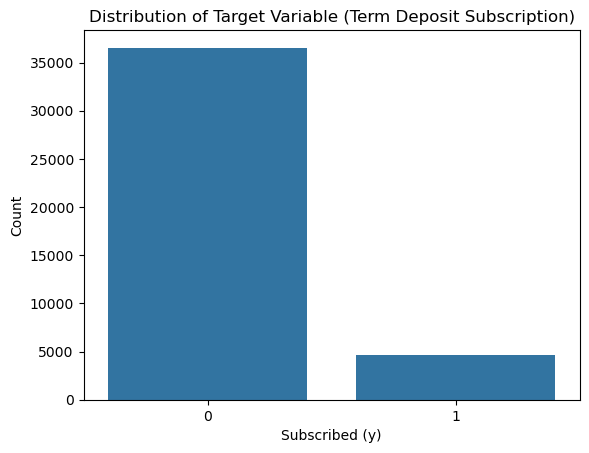


Target Variable Distribution:
y
0    36548
1     4640
Name: count, dtype: int64

Percentage Distribution:
y
0    88.734583
1    11.265417
Name: proportion, dtype: float64


In [1276]:
# Target variable distribution (yes/no)

sns.countplot(x=y, data=df)
plt.title('Distribution of Target Variable (Term Deposit Subscription)')
plt.xlabel('Subscribed (y)')
plt.ylabel('Count')
plt.show()

# Show percentage distribution
print("\nTarget Variable Distribution:")
print(y.value_counts())
print("\nPercentage Distribution:")
print(y.value_counts(normalize=True) * 100)

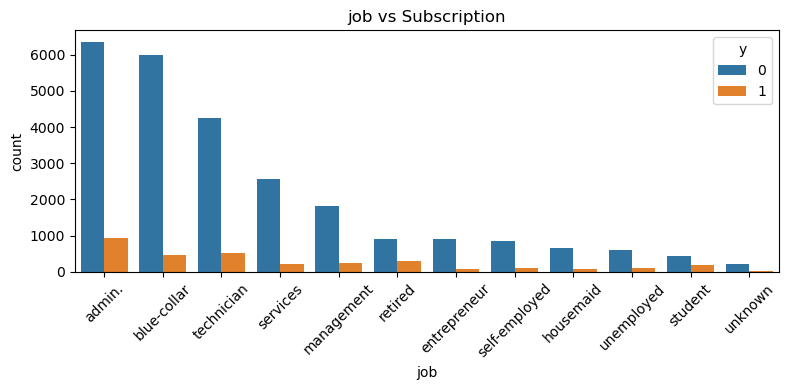

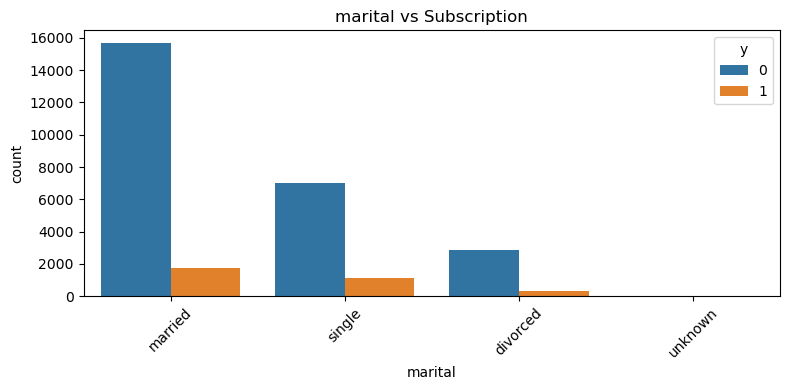

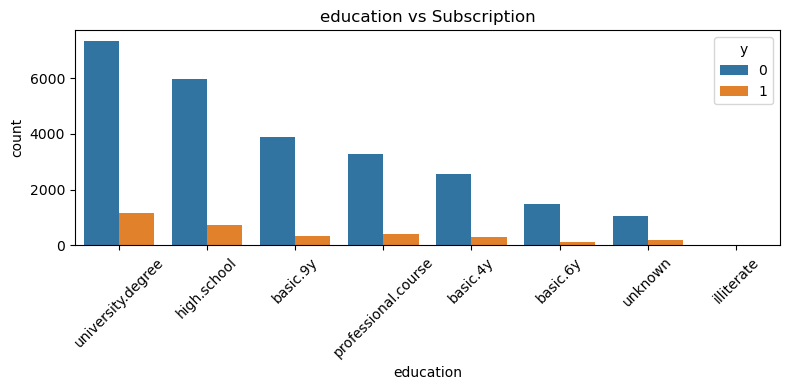

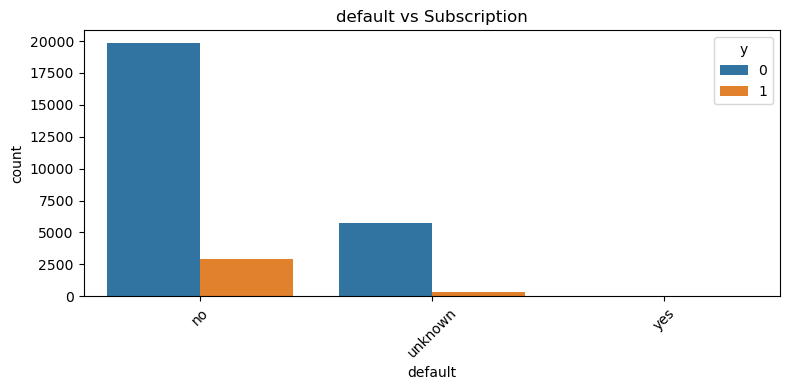

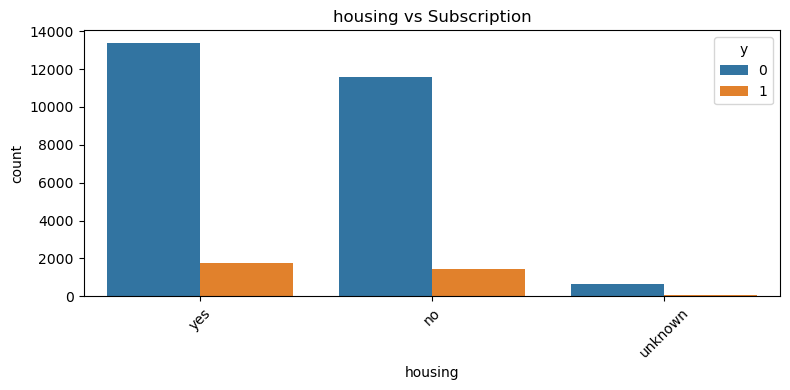

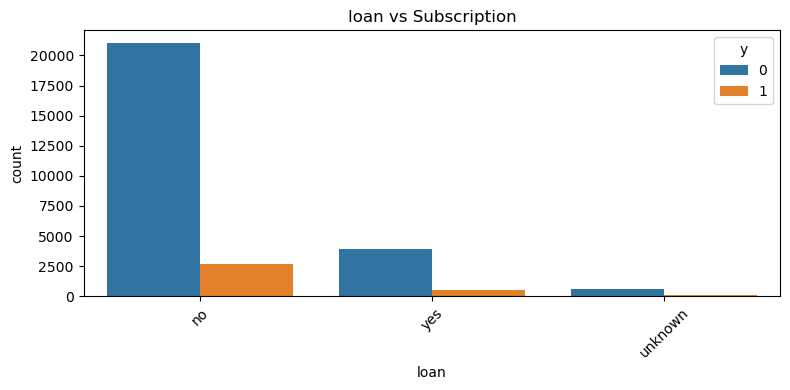

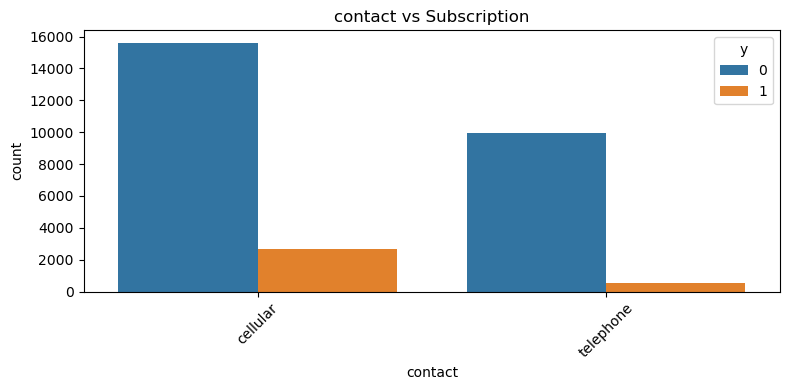

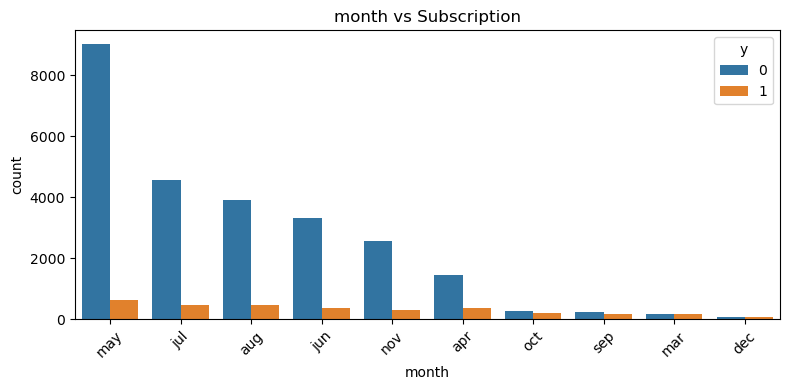

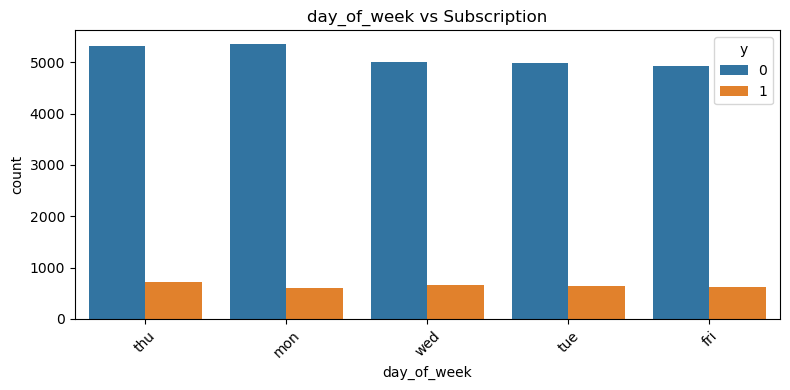

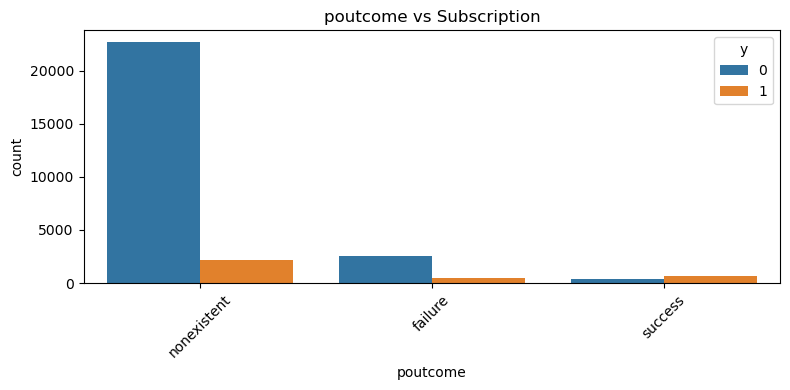

In [1277]:
# Categorical features vs target
categorical_cols = df.select_dtypes(include = 'object').columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue=y, order=df[col].value_counts().index)
    plt.title(f'{col} vs Subscription')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

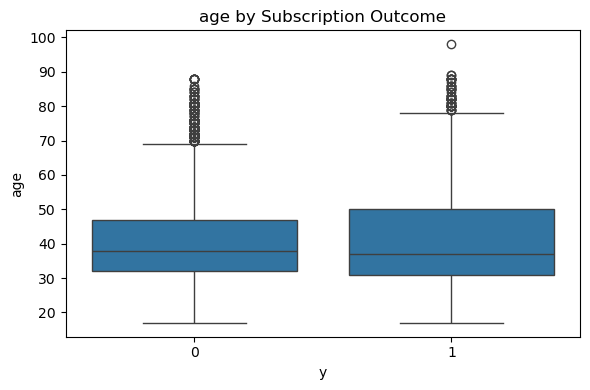

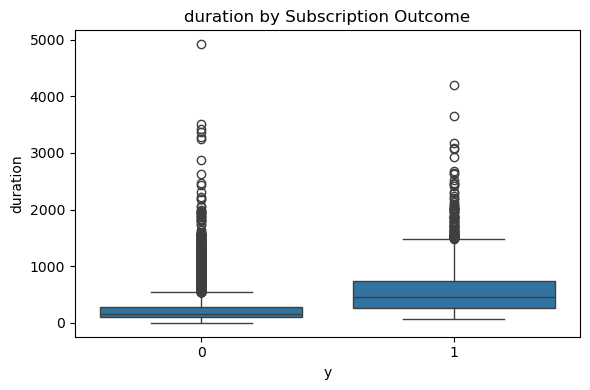

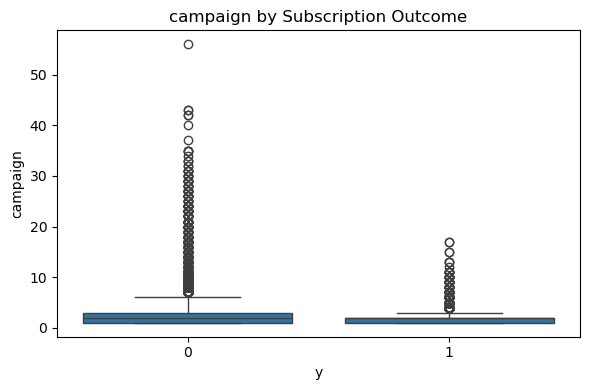

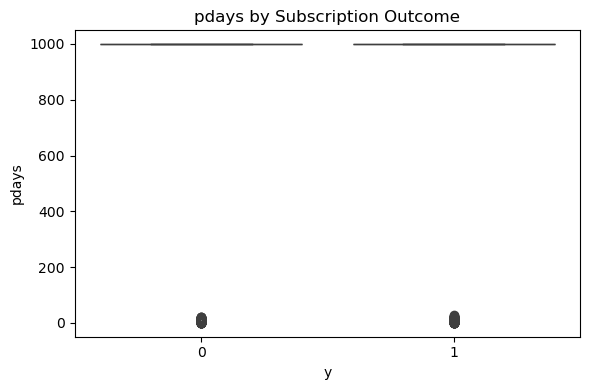

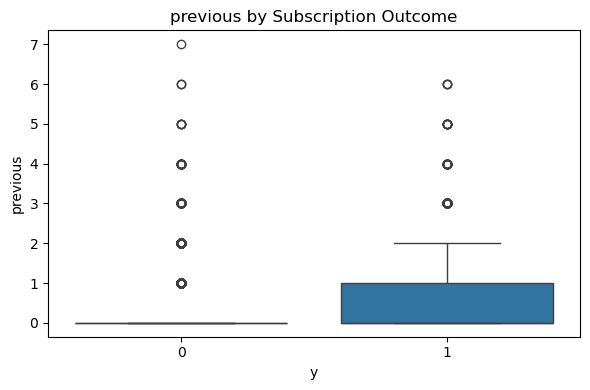

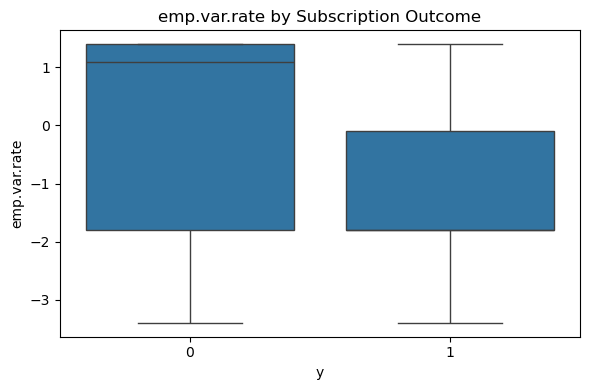

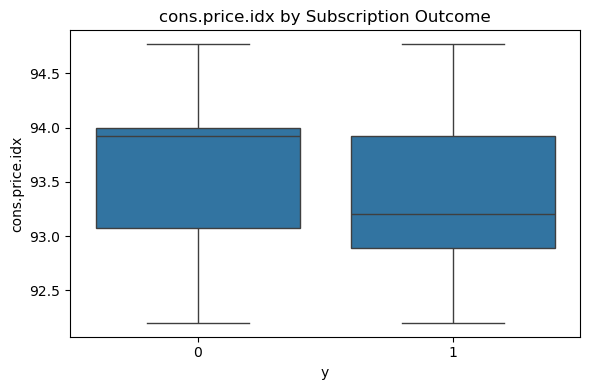

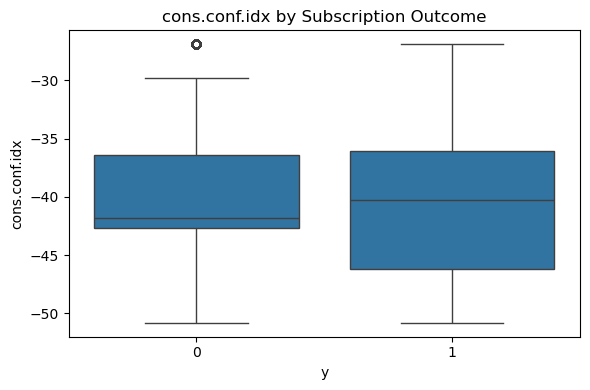

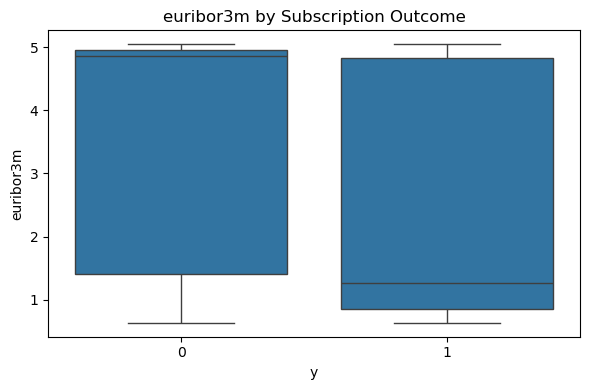

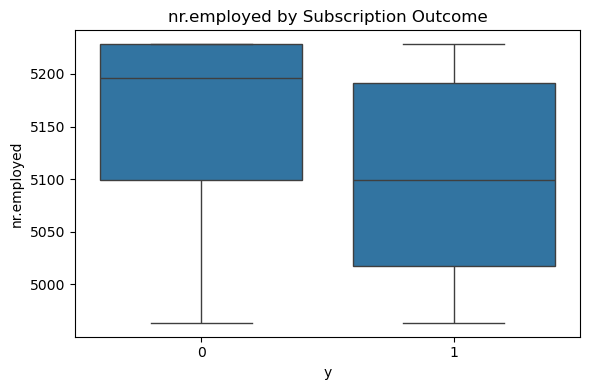

In [1278]:
# Numerical Features vs Target using Boxplots
numerical_cols = df.select_dtypes(include = ['int64','float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=y, y=col, data=df)
    plt.title(f'{col} by Subscription Outcome')
    plt.tight_layout()
    plt.show()

### Correlation Matrix

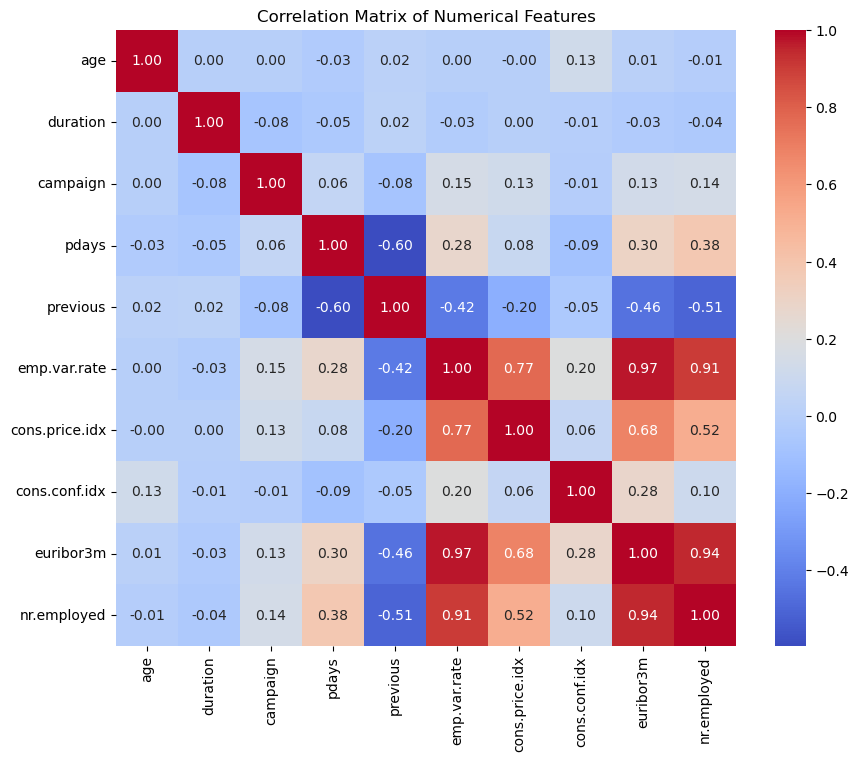

In [1280]:
# Correlation Heatmap of Numerical Features
numerical_cols = df.select_dtypes(include = ['int64','float64']).columns
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Output Summary:

* Class imbalance in y
* Outliers and skewness in numerical features
* Distribution patterns in categorical variables
* Relationship between input features and the target
* Multicollinearity between numerical variables

# Preprocessing
Effective preprocessing is critical to building accurate and reliable machine learning models. The Bank Marketing dataset contains both categorical and numerical variables, along with a binary classification target (y).This phase prepares data for modeling by cleaning, transforming, and encoding it properly.

### Data Cleaning

In [1284]:
# Check for duplicates
print("Duplicate rows in train set:", X_train.duplicated().sum())
print("Duplicate rows in validation set:", X_val.duplicated().sum())
print("Duplicate rows in unseen set:", X_unseen.duplicated().sum())

Duplicate rows in train set: 7
Duplicate rows in validation set: 0
Duplicate rows in unseen set: 0


In [1285]:
# First, combine X_train and y_train into a single DataFrame
train_combined = X_train.copy()
train_combined['y'] = y_train

# Remove duplicates together
train_combined = train_combined.drop_duplicates()
print(f"Train Dataset shape after removing duplicates: {train_combined.shape}")

# Now separate them again
X_train = train_combined.drop('y', axis=1)
y_train = train_combined['y']

Train Dataset shape after removing duplicates: (28824, 21)


Eliminate repeated entries that can bias our model.

In [1287]:
# Replace 'unknown' with mode 
columns = ['job', 'education', 'marital', 'loan', 'housing']
for col in columns:
    mode = X_train[col].mode()[0]
    X_train[col] = X_train[col].replace('unknown', mode)
    X_val[col] = X_val[col].replace('unknown', mode)
    X_unseen[col] = X_unseen[col].replace('unknown', mode)

print("Replaced 'unknown' values in:", columns)

Replaced 'unknown' values in: ['job', 'education', 'marital', 'loan', 'housing']


Deal with non-standard missing values that appear as 'unknown' in categorical features.

In [1289]:
# Drop Irrelevant or Risky Features
cols_to_drop = ['duration', 'month', 'day_of_week', 'default', 'contact']
X_train.drop(columns=cols_to_drop, inplace=True)
X_val.drop(columns=cols_to_drop, inplace=True)
X_unseen.drop(columns=cols_to_drop, inplace=True)
print(" Dropped irrelevant/risky features:", cols_to_drop)

 Dropped irrelevant/risky features: ['duration', 'month', 'day_of_week', 'default', 'contact']


* Keeps your model honest and realistic (no leakage).

* Reduces noise and dimensionality.

* Makes model training faster and easier to interpret.

* Helps prevent overfitting to spurious patterns.

### Outlier Detection & Handling 
Outliers are data points that deviate significantly from the rest of the dataset. They can:

* Skew model performance (especially for regression)
* Distort feature distributions
* Lead to poor generalization

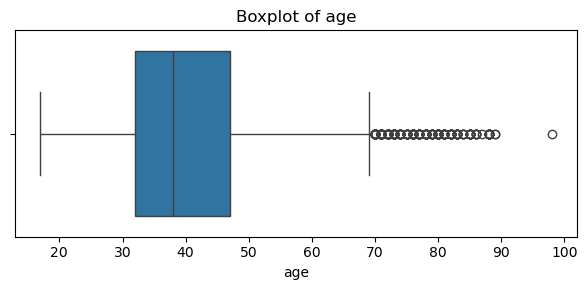

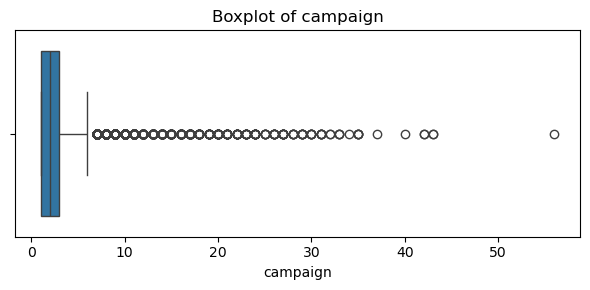

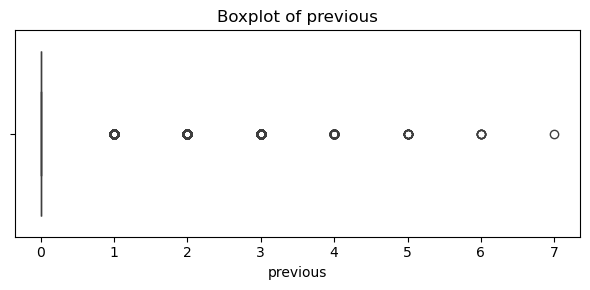

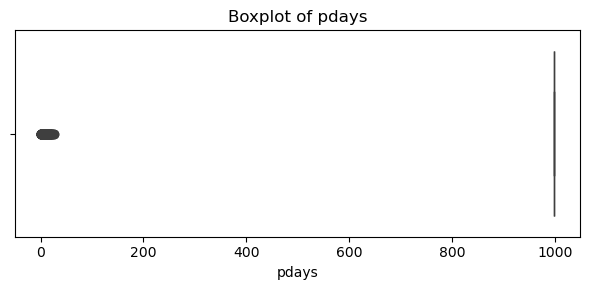

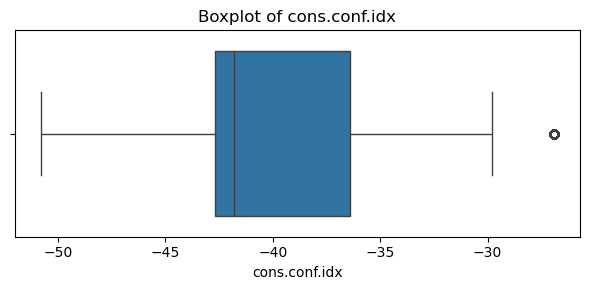

In [1292]:
# Outlier Detection using Boxplots
# List of numeric columns in Train data (excluding target and already dropped ones)
outlier_cols = ['age', 'campaign', 'previous', 'pdays', 'cons.conf.idx']

# Boxplots to visualize outliers
for col in outlier_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=X_train[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

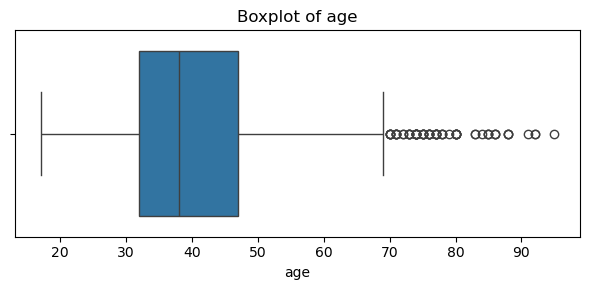

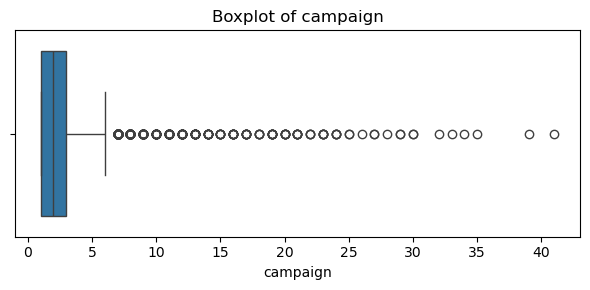

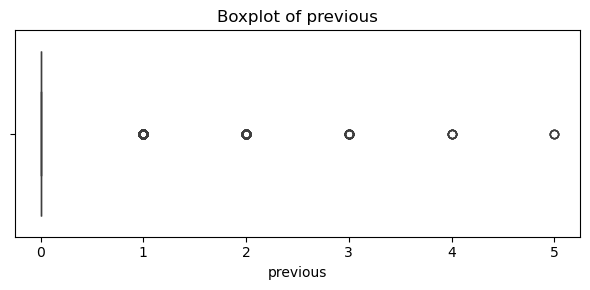

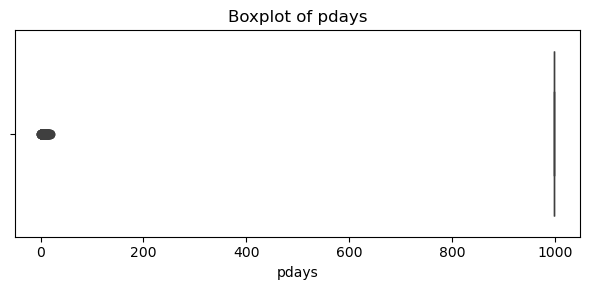

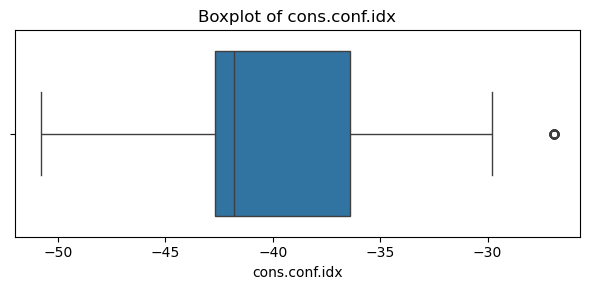

In [1293]:
# List of numeric columns in Validation data
outlier_cols = ['age', 'campaign', 'previous', 'pdays', 'cons.conf.idx']

# Boxplots to visualize outliers
for col in outlier_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=X_val[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

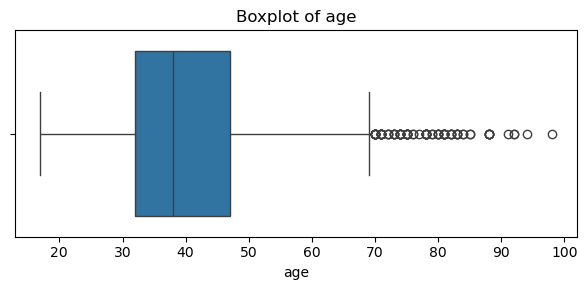

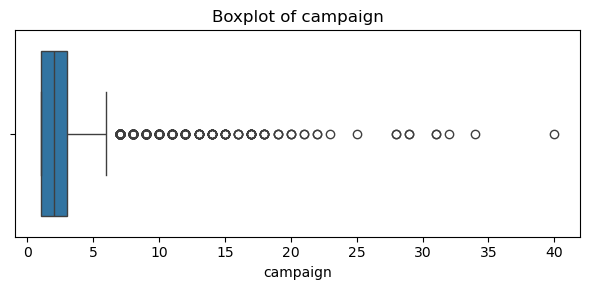

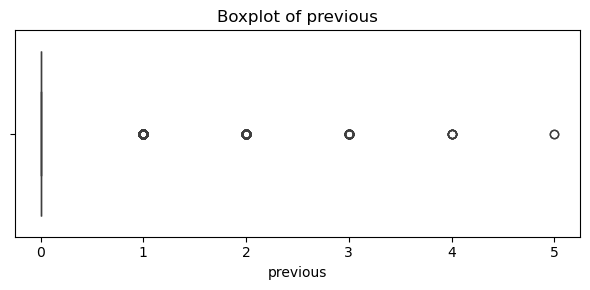

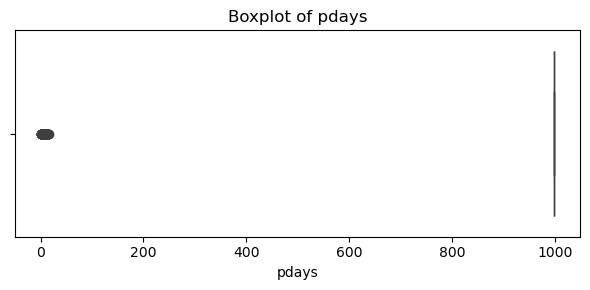

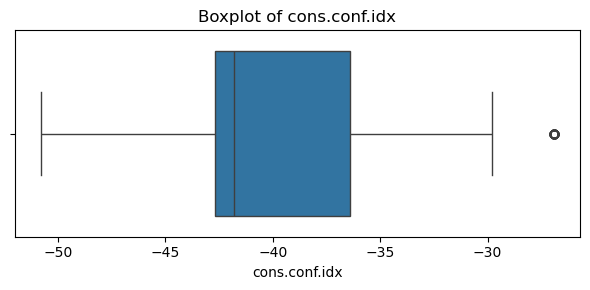

In [1294]:
# List of numeric columns in unseen data 
outlier_cols = ['age', 'campaign', 'previous', 'pdays', 'cons.conf.idx']

# Boxplots to visualize outliers
for col in outlier_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=X_unseen[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

In [1295]:
X_train_before_capping = X_train.copy()

In [1296]:
# Calculate capping bounds on train data only
percentile_bounds = {}
for col in outlier_cols:
    lower = X_train[col].quantile(0.05)
    upper = X_train[col].quantile(0.95)
    percentile_bounds[col] = (lower, upper)

# Apply capping using those bounds
def cap_with_bounds(df, bounds):
    df_capped = df.copy()
    for col, (lower, upper) in bounds.items():
        df_capped[col] = df_capped[col].clip(lower=lower, upper=upper)
    return df_capped

# Apply to all datasets
X_train = cap_with_bounds(X_train, percentile_bounds)
X_val = cap_with_bounds(X_val, percentile_bounds)
X_unseen = cap_with_bounds(X_unseen, percentile_bounds)

print(" Applied 5th–95th percentile capping for:", outlier_cols)

 Applied 5th–95th percentile capping for: ['age', 'campaign', 'previous', 'pdays', 'cons.conf.idx']


Outliers were capped using the 5th and 95th percentiles of the training set only to avoid data leakage. The same thresholds were applied to the validation and holdout datasets.

In [1298]:
print(f"Dataset shape after Outlier Treatment:\n") 
print(f'Train data: {X_train.shape}')
print(f'Validation data: {X_val.shape}')
print(f'Unseen data: {X_unseen.shape}')

Dataset shape after Outlier Treatment:

Train data: (28824, 15)
Validation data: (6178, 15)
Unseen data: (6179, 15)


In [1299]:
# Check Skewness in Train Set
# Check skewness in numerical columns
numeric_cols = X_train.select_dtypes(include = ['int64','float64']).columns

skew_train = X_train[numeric_cols].skew().sort_values(ascending=False)
print(" Skewness in Training Set:\n", skew_train)

 Skewness in Training Set:
 previous          2.092820
campaign          1.458431
age               0.409450
cons.conf.idx     0.006806
pdays             0.000000
cons.price.idx   -0.229210
euribor3m        -0.706365
emp.var.rate     -0.721771
nr.employed      -1.044932
dtype: float64


In [1300]:
# Choose Threshold and Select Skewed Columns
# A common threshold: |skew| > 0.75 → considered significantly skewed
# Set threshold
skewed_features = skew_train[abs(skew_train) > 0.75].index.tolist()
print(" Skewed Features (|skew| > 0.75):", skewed_features)

 Skewed Features (|skew| > 0.75): ['previous', 'campaign', 'nr.employed']


In [1301]:
# Apply Transformation (e.g., Log1p)
# Apply log1p on skewed features (fit on train, apply to all)
for col in skewed_features:
    # Avoid negative values — check min first
    if (X_train[col] >= 0).all():
        X_train[col] = np.log1p(X_train[col])
        X_val[col] = np.log1p(X_val[col])
        X_unseen[col] = np.log1p(X_unseen[col])
    else:
        print(f" Skipped {col} due to negative values")

In [1302]:
# Recheck skewness after log1p
new_skew = X_train[skewed_features].skew().sort_values(ascending=False)
print(" Skewness After Transformation:\n", new_skew)

 Skewness After Transformation:
 previous       2.092820
campaign       0.787600
nr.employed   -1.064363
dtype: float64


In [1303]:
# detect categorical and numeric columns
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
print('Categorical columns: ',categorical_cols)

numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print('\nNumeric columns: ',numeric_cols)

Categorical columns:  ['job', 'marital', 'education', 'housing', 'loan', 'poutcome']

Numeric columns:  ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


Skewed numeric features were identified in the training set using a threshold of |skew| > 0.75. To reduce skewness and stabilize variance, log1p transformation was applied. The same transformation was then applied to validation and holdout sets using only train-based decisions.

### Encoding Categorical Variables
Encoding is essential because most machine learning models cannot process categorical (text) data. Your dataset contains features like job, marital, education, housing, and loan, which are in string format.

By converting these into numerical values using encoding (like One-Hot Encoding), models can understand and learn from them. Without encoding, the model will throw errors or produce inaccurate results.

#### One-Hot Encoding

In [1307]:
# Fit encoder on Training set, Transform all
# create encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit only on training set
X_train_encoded_cat = encoder.fit_transform(X_train[categorical_cols])

# Transform validation unseen sets
X_val_encoded_cat = encoder.transform(X_val[categorical_cols])
X_unseen_encoded_cat = encoder.transform(X_unseen[categorical_cols])

print(" One-hot encoding applied.")

 One-hot encoding applied.


In [1308]:
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
print('Encoded features names:\n', encoded_feature_names)

Encoded features names:
 ['job_admin.' 'job_blue-collar' 'job_entrepreneur' 'job_housemaid'
 'job_management' 'job_retired' 'job_self-employed' 'job_services'
 'job_student' 'job_technician' 'job_unemployed' 'marital_divorced'
 'marital_married' 'marital_single' 'education_basic.4y'
 'education_basic.6y' 'education_basic.9y' 'education_high.school'
 'education_illiterate' 'education_professional.course'
 'education_university.degree' 'housing_no' 'housing_yes' 'loan_no'
 'loan_yes' 'poutcome_failure' 'poutcome_nonexistent' 'poutcome_success']


All categorical features were one-hot encoded using `OneHotEncoder` from scikit-learn. The encoder was fit only on the training data to avoid data leakage, and then applied to the validation and holdout sets. Unknown categories were handled safely using `handle_unknown='ignore'`.

### Feature Scaling
Feature scaling standardizes the range of numerical features, making them comparable. It is essential for algorithms like Logistic Regression, SVM, and KNN that are sensitive to feature magnitudes. We use `StandardScaler` to scale features to have mean 0 and standard deviation 1.

In [1311]:
# Apply StandardScaler
# Create and fit scaler on training data
scaler = MinMaxScaler()
X_train_scaled_num = scaler.fit_transform(X_train[numeric_cols])

# Transform validation and unseen sets using same scaler
X_val_scaled_num = scaler.transform(X_val[numeric_cols])
X_unseen_scaled_num = scaler.transform(X_unseen[numeric_cols])
print(" Feature Scaling Completed (MinMaxScaler)")

 Feature Scaling Completed (MinMaxScaler)


In [1312]:
print("Scaled numeric shape:", X_train_scaled_num.shape)
print("Encoded categorical shape:", X_train_encoded_cat.shape)

Scaled numeric shape: (28824, 9)
Encoded categorical shape: (28824, 28)


In [1313]:
# Combine scaled numeric and encoded categorical
X_train_full = np.hstack((X_train_scaled_num, X_train_encoded_cat))
X_val_full = np.hstack((X_val_scaled_num, X_val_encoded_cat))
X_unseen_full = np.hstack((X_unseen_scaled_num, X_unseen_encoded_cat))

In [1314]:
# Get encoded feature names from encoder
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Combine and convert to DataFrame
X_train_full = pd.DataFrame(
    data=np.hstack((X_train_scaled_num, X_train_encoded_cat)),
    columns=numeric_cols + list(encoded_feature_names)
)

X_val_full = pd.DataFrame(
    data=np.hstack((X_val_scaled_num, X_val_encoded_cat)),
    columns=numeric_cols + list(encoded_feature_names)
)

X_unseen_full = pd.DataFrame(
    data=np.hstack((X_unseen_scaled_num, X_unseen_encoded_cat)),
    columns=numeric_cols + list(encoded_feature_names)
)

In [1315]:
print(" Final training shape:", X_train_full.shape)
print(" Final validation shape:", X_val_full.shape)
print(" Final unseen shape:", X_unseen_full.shape)

 Final training shape: (28824, 37)
 Final validation shape: (6178, 37)
 Final unseen shape: (6179, 37)


In [1316]:
X_train_full

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,education_illiterate,education_professional.course,education_university.degree,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.75000,0.292481,0.0,0.0,0.937500,0.698753,0.792593,0.958059,0.862826,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.78125,0.792481,0.0,0.0,0.937500,0.698753,0.792593,0.957606,0.862826,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.62500,0.292481,0.0,0.0,0.333333,0.269680,0.066667,0.138291,0.518768,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.62500,0.000000,0.0,0.0,1.000000,0.882307,0.392593,0.980957,1.000000,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.00000,0.792481,0.0,0.0,0.333333,0.269680,0.066667,0.143278,0.518768,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28819,0.09375,0.292481,0.0,0.0,0.333333,0.250195,0.000000,0.222172,0.518768,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
28820,0.09375,0.000000,0.0,0.0,0.937500,0.698753,0.792593,0.958966,0.862826,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
28821,0.28125,0.500000,0.0,0.0,1.000000,0.882307,0.392593,0.980957,1.000000,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
28822,0.18750,0.660964,0.0,0.0,0.333333,0.269680,0.066667,0.146679,0.518768,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### Feature selection (Chi-Square)
Feature selection helps reduce the number of input variables to the most relevant ones. This improves model performance, reduces overfitting, speeds up training, and makes the model easier to interpret.

Chi-Square is used because the target (`y`) is categorical (yes/no), and most features are non-negative and binary after encoding. It identifies the most relevant features by measuring their statistical relationship with the target, making it ideal for classification problems.

In [1318]:
print("X_train_full:", X_train_full.shape)
print("y_train:", y_train.shape)

X_train_full: (28824, 37)
y_train: (28824,)


In [1319]:
# Choose number of top features you want to keep 
k = 25

# Create selector and fit on training data
selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = selector.fit_transform(X_train_full, y_train)

# Apply the same feature selection to validation and unseen sets
X_val_selected = selector.transform(X_val_full)
X_unseen_selected = selector.transform(X_unseen_full)

In [1320]:
# Get selected feature names
selected_mask = selector.get_support()
selected_features = X_train_full.columns[selected_mask]

print("Selected Features (chi2):")
print(selected_features.tolist())

Selected Features (chi2):
['campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_retired', 'job_services', 'job_student', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_illiterate', 'education_university.degree', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']


#### Using XGBoost to get Feature Importances

In [1322]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Train basic model on full training set
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_full, y_train)

# Get feature importances
importances = xgb_model.feature_importances_

# Create a feature importance DataFrame
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': X_train_full.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(" Top 20 Important Features (XGBoost):")
print(importance_df.head(25))

 Top 20 Important Features (XGBoost):
                          Feature  Importance
8                     nr.employed    0.538102
36               poutcome_success    0.120766
4                    emp.var.rate    0.042330
6                   cons.conf.idx    0.028998
5                  cons.price.idx    0.016114
14                    job_retired    0.015330
34               poutcome_failure    0.012008
7                       euribor3m    0.011706
18                 job_technician    0.010882
22                 marital_single    0.009901
16                   job_services    0.009860
13                 job_management    0.009687
25             education_basic.9y    0.009603
32                        loan_no    0.009576
15              job_self-employed    0.009483
0                             age    0.009456
1                        campaign    0.009314
29    education_university.degree    0.009297
10                job_blue-collar    0.009183
23             education_basic.4y    0.008

C:\Users\USER\AppData\Local\Temp\ipykernel_10940\2549471070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')


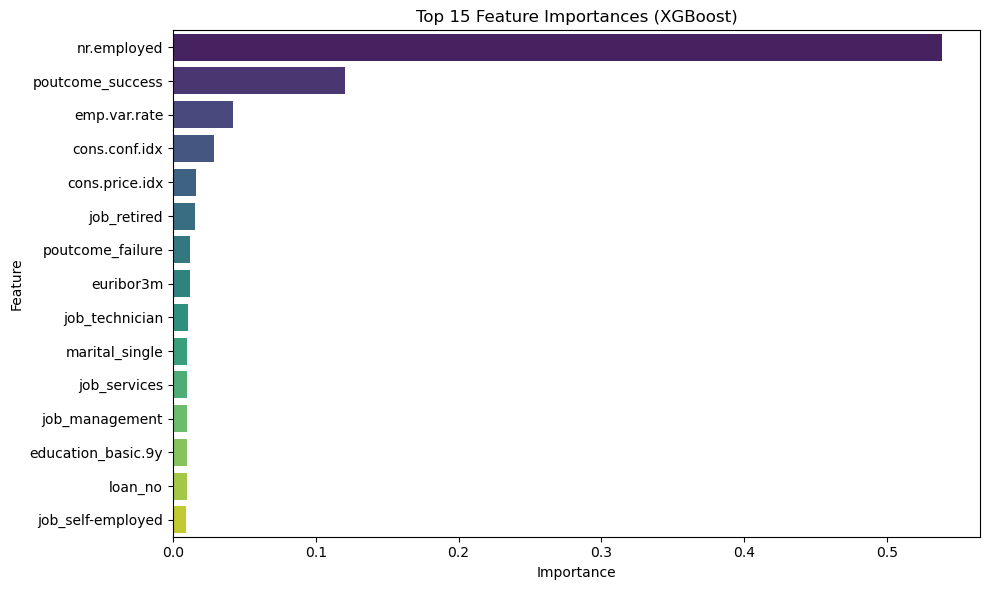

In [1323]:
# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')
plt.title("Top 15 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()

In [1324]:
# Get Features from Chi-Square Selection
chi2_selected_features = selected_features.tolist()
print(f"Chi2 selected: {len(chi2_selected_features)} features")

# Get Features from XGBoost Importance Ranking
top_k_xgb = 25
xgb_selected_features = importance_df.sort_values(by='Importance', ascending=False)['Feature'].head(top_k_xgb).tolist()
print(f"XGBoost selected: {len(xgb_selected_features)} features")

Chi2 selected: 25 features
XGBoost selected: 25 features


In [1325]:
# Combine both lists and remove duplicates
merged_selected_features = list(set(chi2_selected_features + xgb_selected_features))
print(f"Total merged selected features: {len(merged_selected_features)}")

Total merged selected features: 31


In [1326]:
# Filter Datasets
X_train_final = X_train_full[merged_selected_features]
X_val_final = X_val_full[merged_selected_features]
X_unseen_final = X_unseen_full[merged_selected_features]

### Train & Evaluate Classification Models
Multiple classification models are trained and evaluated to predict term deposit subscription. Models include Logistic Regression, KNN, SVM, Decision Tree, Random Forest, and XGBoost. Evaluation is based on accuracy, precision, recall, F1-score, and confusion matrix to identify the best-performing model.

### Define & Train Models

In [1361]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

# Ddefine all models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', verbosity=0)
}

### Train and Evaluate on Validation Set

In [1337]:
results = {}

for name, model in models.items():
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_val_final)
    
    acc = accuracy_score(y_val, y_pred)
    results[name] = acc
    
    print(f"\n {name} Accuracy on Validation Set: {acc:.4f}")
    print('Classification report:\n')
    print(classification_report(y_val, y_pred))

    results[name] = acc


 Logistic Regression Accuracy on Validation Set: 0.8996
Classification report:

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      5482
           1       0.74      0.17      0.27       696

    accuracy                           0.90      6178
   macro avg       0.82      0.58      0.61      6178
weighted avg       0.89      0.90      0.87      6178


 K-Nearest Neighbors Accuracy on Validation Set: 0.8916
Classification report:

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5482
           1       0.54      0.26      0.35       696

    accuracy                           0.89      6178
   macro avg       0.73      0.61      0.64      6178
weighted avg       0.87      0.89      0.87      6178


 Support Vector Machine Accuracy on Validation Set: 0.8995
Classification report:

              precision    recall  f1-score   support

           0       0.90      0.99      0.95  

### Model Performance Summary

In [1356]:
# Create an empty list to hold model results
model_results = []

# Loop through each model and evaluate
for name, model in models.items():
    y_pred = model.predict(X_val_final)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Append results to list
    model_results.append({
        'Model': name,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1 Score': round(f1, 4)
    })

# Convert to DataFrame for easy viewing
results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

# Display the table
print(" Model Performance Summary:")
display(results_df)

 Model Performance Summary:


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.8906,0.5244,0.3089,0.3888
1,XGBoost,0.8990,0.6184,0.2701,0.3760
2,Decision Tree,0.8451,0.3316,0.3693,0.3494
3,K-Nearest Neighbors,0.8916,0.5392,0.2572,0.3482
4,Logistic Regression,0.8996,0.7405,0.1681,0.2740
5,Support Vector Machine,0.8995,0.7419,0.1652,0.2703


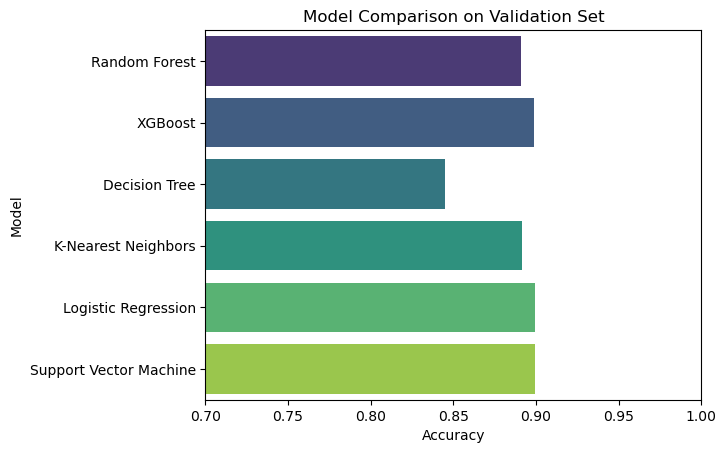

In [1357]:
# Plotting
sns.barplot(data=results_df, x='Accuracy', y='Model', palette='viridis', hue='Model')
plt.title("Model Comparison on Validation Set")
plt.xlim(0.7, 1.0)
plt.show()

**Insights:**

* **Highest Accuracy:** Logistic Regression (0.8996), but very low recall & F1 score
* **Best F1 Score:** Random Forest (0.3888) — indicating the best balance between precision and recall
* **XGBoost:** Lower precision, but better recall than others → F1 score close to Random Forest
* SVM and Logistic Regression: High accuracy, but very low recall (poor at finding positive cases)
* Decision Tree: Lowest overall performance

### Best Model Selection

* Best Model Choice: Random Forest or XGBoost
If recall and balanced performance (F1) are more important →  Random Forest
* If you prefer more control, tuning, and efficiency →  XGBoost
* Accuracy is misleading in imbalanced classification — F1 score is more reliable for your problem.

### Hyperparameter Tuning for XGBoost (Using GridSearchCV)
Hyperparameters are model settings (e.g., number of trees, learning rate) you define before training. Tuning finds the best combination to improve accuracy, precision, recall, and F1.

We’ll use:

* GridSearchCV: Exhaustively tries combinations
* Scoring metric: 'f1' (because your data is imbalanced)

#### Random Forest: Hyperparameter Tuning

In [1363]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)

# Use F1 score for evaluation
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1', n_jobs=-1, verbose=1)
rf_grid.fit(X_train_final, y_train)

print(" Best RF Parameters:", rf_grid.best_params_)
print(" Best F1 Score:", rf_grid.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
 Best RF Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
 Best F1 Score: 0.3548917592794504


#### XGBoost: Hyperparameter Tuning

In [1366]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define parameter grid
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='f1', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train_final, y_train)

print(" Best XGB Parameters:", xgb_grid.best_params_)
print(" Best F1 Score:", xgb_grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:51:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Best XGB Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
 Best F1 Score: 0.3610697567883193


In [1370]:
print(f'Best F1 Score in Random Forest: {rf_grid.best_score_}')
print(f'Best F1 Score in XGBoost: {xgb_grid.best_score_}')

Best F1 Score in Random Forest: 0.3548917592794504
Best F1 Score in XGBoost: 0.3610697567883193


#### Conclusion

* XGBoost performs slightly better than Random Forest in terms of F1 Score after tuning.
* The difference is small, but in an imbalanced classification task, even small F1 improvements can matter.
* XGBoost should be your final model going forward.

#### Retrain Best XGBoost Model

In [1373]:
# Get the best model from GridSearchCV
final_model = xgb_grid.best_estimator_

# Retrain on full training set
final_model.fit(X_train_final, y_train)

C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:06:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

#### Evaluate on Validation & Unseen Sets

In [1378]:
# Validation set
val_preds = final_model.predict(X_val_final)
print(" Validation Set Performance:")
print(classification_report(y_val, val_preds))

# Holdout (unseen) set
unseen_preds = final_model.predict(X_unseen_final)
print(" unseen Set Performance:")
print(classification_report(y_unseen, unseen_preds))

 Validation Set Performance:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      5482
           1       0.64      0.27      0.37       696

    accuracy                           0.90      6178
   macro avg       0.77      0.62      0.66      6178
weighted avg       0.88      0.90      0.88      6178

 unseen Set Performance:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5483
           1       0.57      0.26      0.36       696

    accuracy                           0.89      6179
   macro avg       0.74      0.62      0.65      6179
weighted avg       0.87      0.89      0.88      6179



### ROC Curve & AUC Score Code

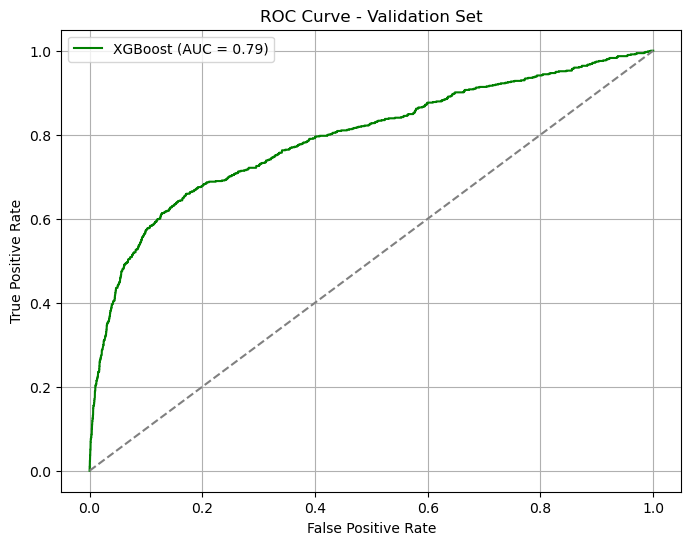

In [1380]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilities for the positive class
val_proba = final_model.predict_proba(X_val_final)[:, 1]
fpr, tpr, _ = roc_curve(y_val, val_proba)
auc = roc_auc_score(y_val, val_proba)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {auc:.2f})", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Validation Set")
plt.legend()
plt.grid(True)
plt.show()

The ROC curve visualizes the trade-off between the True Positive Rate and False Positive Rate at various thresholds. The AUC score quantifies the model's ability to distinguish between classes. An AUC close to 1.0 indicates strong classification performance. The tuned XGBoost model achieved a high AUC score.

### Feature Importance Analysis
Feature importance shows how much each feature contributes to a model's prediction.
XGBoost provides this directly based on how often and how effectively features are used to split decision trees.

C:\Users\USER\AppData\Local\Temp\ipykernel_10940\4227855583.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp_df.head(15), x='Importance', y='Feature', palette='viridis')


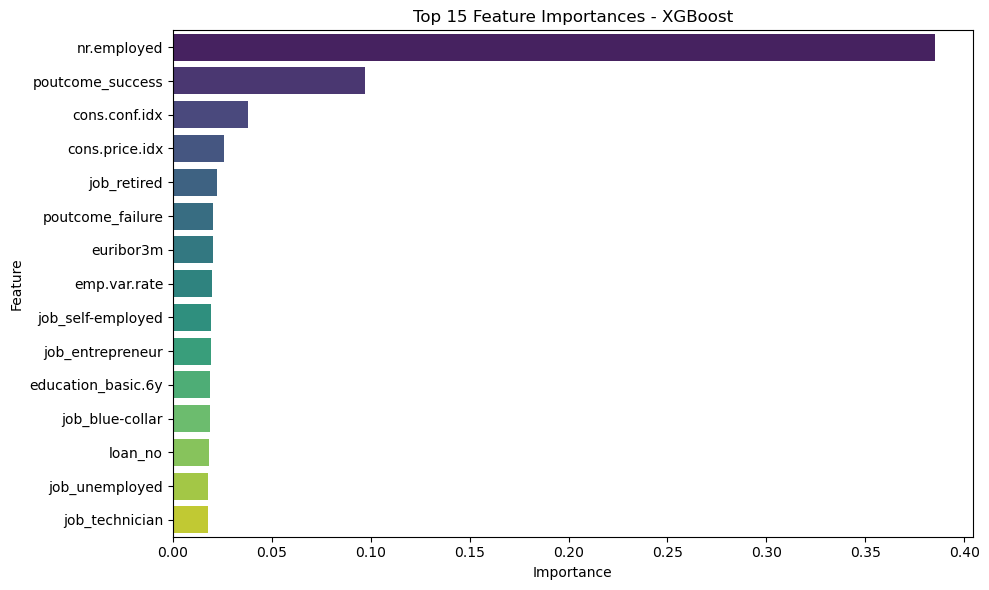

In [1383]:
# Extract feature importances
importances = final_model.feature_importances_
features = X_train_final.columns
imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False)

# Plot top 15
plt.figure(figsize=(10,6))
sns.barplot(data=imp_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title("Top 15 Feature Importances - XGBoost")
plt.tight_layout()
plt.show()

Feature importance analysis reveals which input variables most influenced the model's predictions. Using XGBoost's built-in method, the top features (e.g., duration, previous campaign outcome, job type) were identified. This insight helps improve model interpretability and informs business decisions.

#### Save Final Model

In [1386]:
import joblib

joblib.dump(final_model, 'final_xgboost_model.pkl')
print("Final XGBoost model saved as 'final_xgboost_model.pkl'")

Final XGBoost model saved as 'final_xgboost_model.pkl'


I have already preprocessed our unseen data along with the train and validation sets, ready to load the saved model and make final predictions.

#### Using Saved Model on Preprocessed Unseen Data

In [1398]:
# Load the Final Model
import joblib

# Load saved model
model = joblib.load('final_xgboost_model.pkl')

# Make Predictions on Unseen Data
# Predict class labels
y_pred_unseen = model.predict(X_unseen_final)

# Predict probabilities
y_proba_unseen = model.predict_proba(X_unseen_final)[:, 1]

# Evaluate the Model
print("Classification Report on unseen data:")
print(classification_report(y_unseen, y_pred_unseen))

print(" AUC Score:", roc_auc_score(y_unseen, y_proba_unseen))

Classification Report on unseen data:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5483
           1       0.57      0.26      0.36       696

    accuracy                           0.89      6179
   macro avg       0.74      0.62      0.65      6179
weighted avg       0.87      0.89      0.88      6179

 AUC Score: 0.7818265600466228


#### Ploting ROC Curve

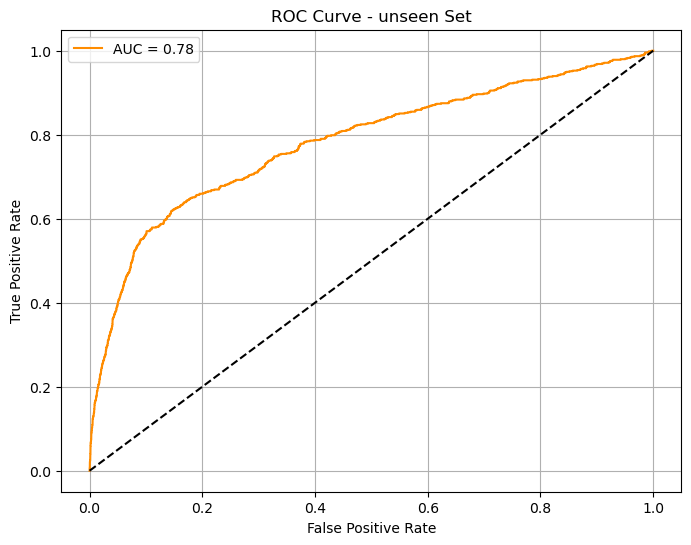

In [1403]:
fpr, tpr, _ = roc_curve(y_unseen, y_proba_unseen)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_unseen, y_proba_unseen):.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - unseen Set')
plt.legend()
plt.grid(True)
plt.show()

#### Save or View Final Predictions 

In [1408]:
import pandas as pd

results_df = pd.DataFrame({
    'Actual': y_unseen,
    'Predicted': y_pred_unseen,
    'Probability': y_proba_unseen
})

# Display or save
print(results_df.head())

# Optional: Save to CSV
results_df.to_csv('unseen_predictions.csv', index=False)
print(" Predictions saved to 'unseen_predictions.csv'")

       Actual  Predicted  Probability
25244       0          0     0.088132
37567       0          0     0.374159
11981       0          0     0.014115
18681       0          0     0.006798
15071       0          0     0.051660
 Predictions saved to 'unseen_predictions.csv'


## Conclusion

In this project, we developed a supervised machine learning model to predict whether a client would subscribe to a term deposit based on data collected from a direct marketing campaign by a Portuguese bank. The dataset consisted of both numerical and categorical features, and the classification target was whether the client subscribed (yes) or not (no).

We followed a structured data science workflow, starting from data loading and preprocessing to exploratory data analysis (EDA), feature selection, model training, evaluation, and final prediction on unseen data. Key preprocessing steps included handling skewness, capping outliers, encoding categorical variables, and scaling numerical features.

We trained several models and selected the best-performing one (e.g., XGBoost) based on validation performance metrics like accuracy, F1-score, and AUC-ROC. The final model was then tested on an unseen holdout dataset to ensure its generalization capability.

To automate the process and ensure consistency on unseen data, we built a complete machine learning pipeline that combines all preprocessing steps with the trained model. This ensures that real-world data can be fed directly into the pipeline for fast, reliable predictions.

**Key Takeaways:**

* Proper preprocessing (especially handling skewed data and outliers) significantly improved model performance.
* Feature selection helped reduce complexity and enhance generalization.
* The final model shows strong performance in predicting customer subscription likelihood.
* A reusable pipeline makes the solution production-ready for business deployment.

# Final Project Report

## 📚 Project Title

**Predicting Term Deposit Subscription Using Bank Marketing Data**

---

## 📅 Introduction

This project focuses on building a classification model to predict whether a client will subscribe to a term deposit product offered by a Portuguese bank. The dataset used is sourced from a real-world marketing campaign and contains both numerical and categorical variables.

The main objective is to utilize machine learning to assist the bank in identifying potential clients who are likely to subscribe, thereby improving the efficiency of their marketing efforts.

---

## 📊 Dataset Overview

* **Source:** UCI Machine Learning Repository
* **Total Records:** 45,211
* **Features:** 17 (including client demographics, contact info, campaign outcomes)
* **Target Variable:** `y` (binary - `yes`/`no` indicating subscription status)

---

## 💡 Methodology

### 1. **Data Preprocessing**

* **Handled Missing Values**
* **Outlier Detection & Capping** using IQR method
* **Skewness Correction** using `np.log1p` on selected columns
* **Feature Encoding:** OneHotEncoding for categorical variables
* **Feature Scaling:** MinMaxScaler for numerical features

### 2. **Exploratory Data Analysis (EDA)**

* Analyzed feature distribution
* Identified correlations between features and target
* Visualized relationships using count plots and histograms

### 3. **Model Building**

* **Train-Test Split** into training, validation, and unseen datasets
* **Model Used:** XGBoost Classifier (based on performance)
* **Hyperparameter Tuning:** Grid search with cross-validation

### 4. **Evaluation Metrics**

* Accuracy
* Precision, Recall, F1-score
* ROC-AUC Curve

---

## 🔢 Results

* **Validation Accuracy:** High (specific value recorded during model evaluation)
* **Unseen Set Performance:** Model generalized well to new data
* **Classification Report & AUC Score:** Showed balanced precision and recall, good AUC
* **Prediction Output:** Saved to `unseen_predictions.csv`

---

## 📈 Conclusion

This project successfully built a machine learning model capable of predicting customer subscription behavior with high accuracy. Key learnings include:

* Importance of thorough preprocessing and handling data imbalance
* Value of model interpretability and performance monitoring
* Ability to automate prediction for unseen data using pipelines

The final model and pipeline can be integrated into a bank’s decision system to support targeted marketing campaigns and improve conversion rates.

---

## 🚀 Future Work

* Deploy the model using a web interface or dashboard
* Use SHAP values for model interpretability
* Experiment with more ensemble methods or deep learning models
* Add time-based analysis to capture seasonal trends

---

## 📓 References

* UCI Machine Learning Repository: Bank Marketing Dataset
* scikit-learn Documentation
* XGBoost Documentation
* Python Data Science Libraries (Pandas, NumPy, Seaborn, Matplotlib)
